In [1]:
import dowhy
import pandas as pd

c:\Users\antonio\anaconda3\envs\causal_ds_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


- Treatment (Binary): Treatment column that indicates wether the person received treatment or not
- Education (Binary): Years of education
- Black (Binary): Is black
- Hispanic (Binary): Is hispanic
- Married (Binary): Is married
- No Degree (Binary): Has High School diploma
- re74 (float): Real earnings 1974 prior study participation (pre-treatment)
- re75 (float): Real earnings 1975 prior study participation (pos-treatment)
- re78 (float): Real earnings 1978 after study participation (Y)

In [22]:
lalonde_df = pd.read_csv("lalonde_dataset.csv", index_col=0)
integer_cols =  ["treat", "age", "educ", "black", "hisp", "married", "nodegr", "u74", "u75"]
lalonde_df[integer_cols] = lalonde_df[integer_cols].astype("int64")
lalonde_df.rename(columns = {
    "treat":"treatment",
    "re78":"y",
    "re75":"earnings75",
    "re74":"earnings74",
    "u74":"unemployed74",
    "u75":"unemployed75",
    "educ":"education",
    "nodegr":"non_degree",
    "hisp":"hispanic",
}, inplace=True)
lalonde_df = lalonde_df[["age", "education", "black", "hispanic", "married", "non_degree", "earnings74", "earnings75", "unemployed74", "unemployed75", "treatment", "y"]]
lalonde_df.head()

,age,education,black,hispanic,married,non_degree,earnings74,earnings75,unemployed74,unemployed75,treatment,y
0,23,10,1,0,0,1,0.0,0.0,1,1,0,0.00
1,26,12,0,0,0,0,0.0,0.0,1,1,0,12383.68
2,22,9,1,0,0,1,0.0,0.0,1,1,0,0.00
3,18,9,1,0,0,1,0.0,0.0,1,1,0,10740.08
4,45,11,1,0,0,1,0.0,0.0,1,1,0,11796.47


In [23]:
model=dowhy.CausalModel(
        data = lalonde_df,
        treatment='treatment',
        outcome='y',
        common_causes=["non_degree", "black" ,"hispanic", "age", "education","married"])
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_weighting",
        target_units="ate",
        method_params={"weighting_scheme":"ips_weight"})
#print(estimate)
print("Causal Estimate is " + str(estimate.value))

Causal Estimate is 1639.8517573198114


c:\Users\antonio\anaconda3\envs\causal_ds_env\Lib\site-packages\dowhy\interpreters\confounder_distribution_interpreter.py:87: FutureWarning: The provided callable <function sum at 0x000001FBFF129D00> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  barplot_df_after = df.groupby([self.var_name, treated]).agg({"weight": np.sum}).reset_index()


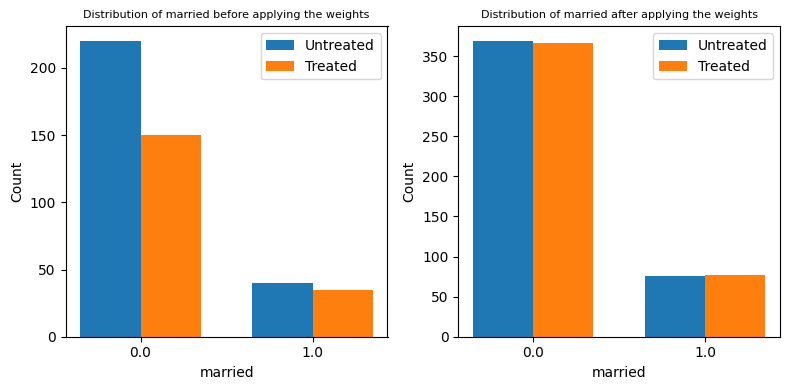

In [28]:
estimate.interpret(method_name="confounder_distribution_interpreter",var_type='discrete',
                   var_name='married', fig_size = (8, 4), font_size = 8)

Proving the ATE

In [31]:
df = model._data
ps = df['propensity_score']
y = df['y']
z = df['treatment']

ey1 = z*y/ps / sum(z/ps)
ey0 = (1-z)*y/(1-ps) / sum((1-z)/(1-ps))
ate = ey1.sum()-ey0.sum()
print("Causal Estimate is " + str(ate))

Causal Estimate is 1639.8517573198142
